<a href="https://colab.research.google.com/github/vantainguyen/A-B-Testing/blob/main/Bandit_Thompson_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from __future__ import print_function, division
from builtins import range

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

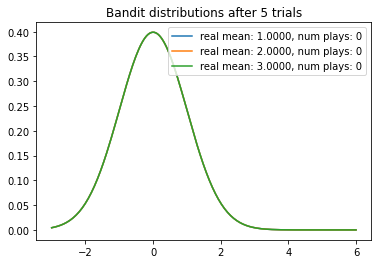

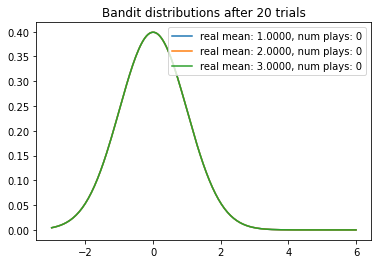

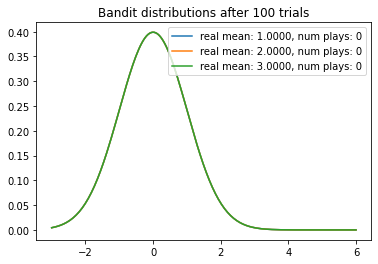

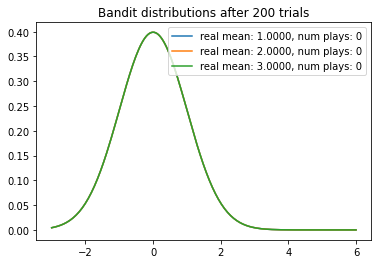

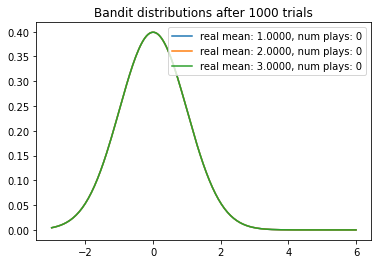

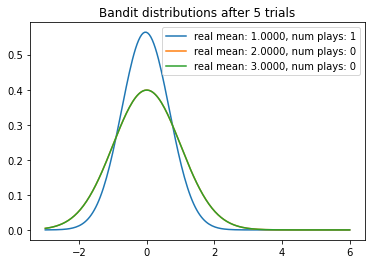

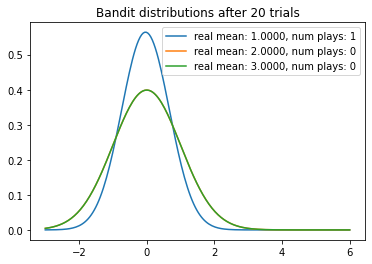

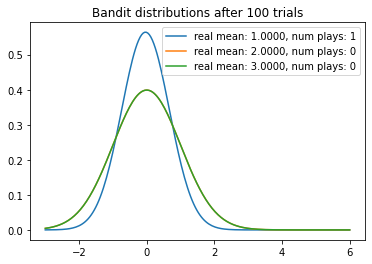

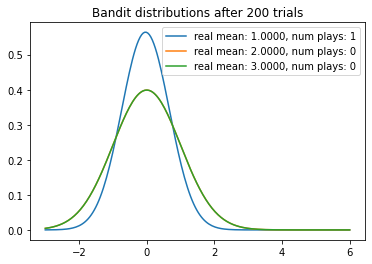

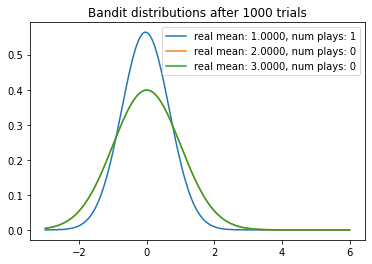

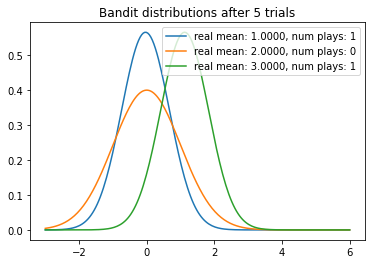

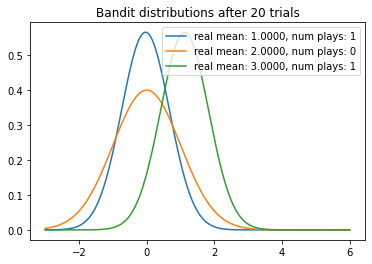

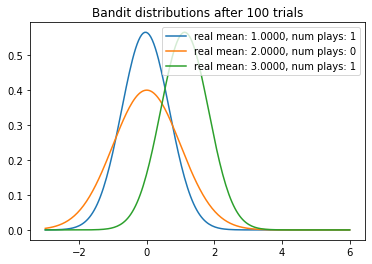

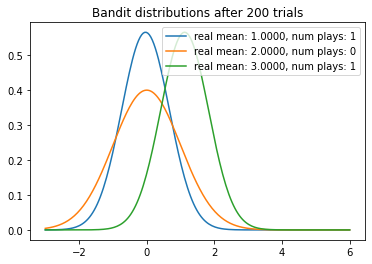

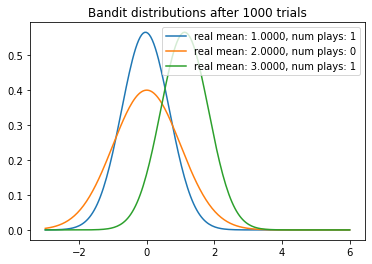

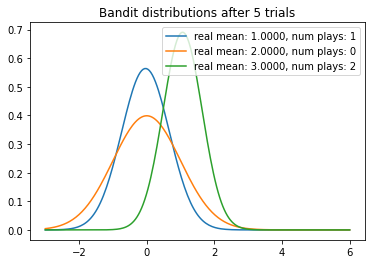

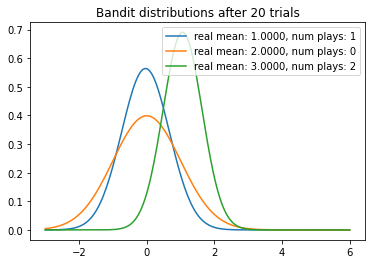

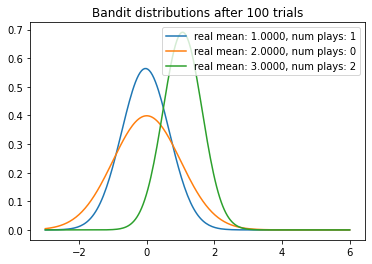

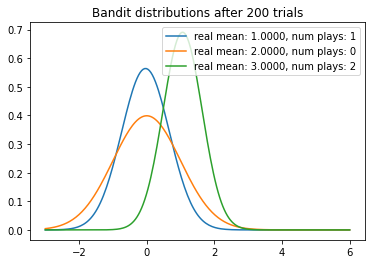

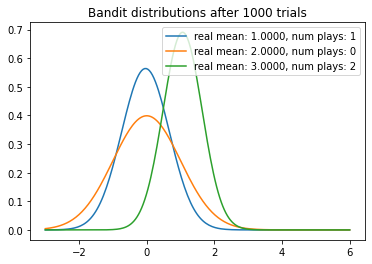

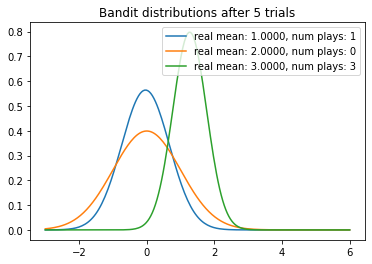

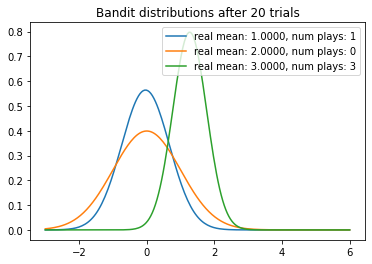

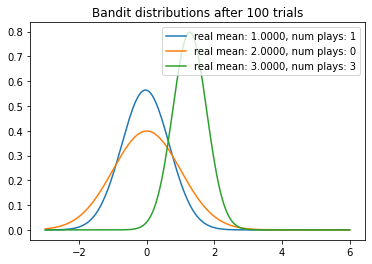

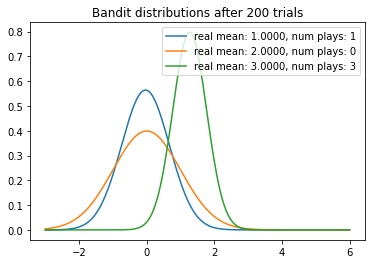

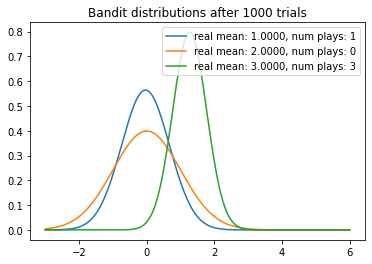

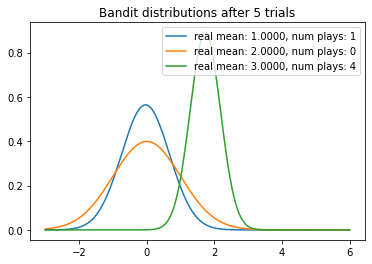

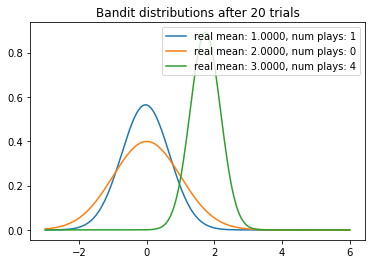

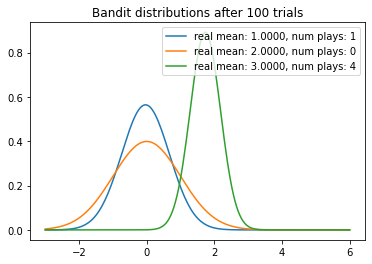

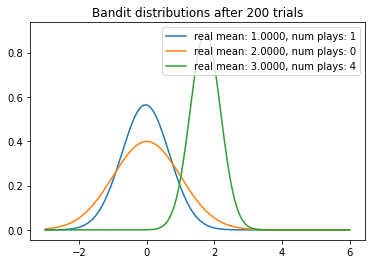

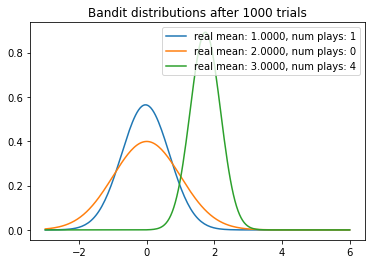

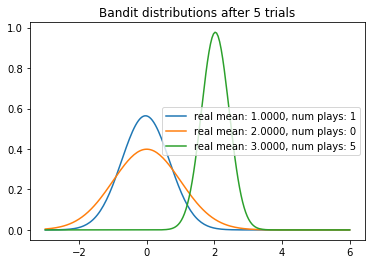

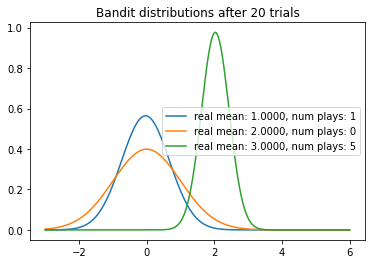

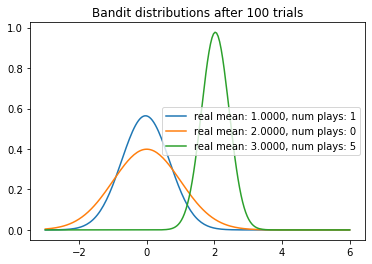

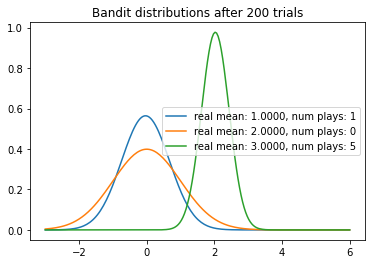

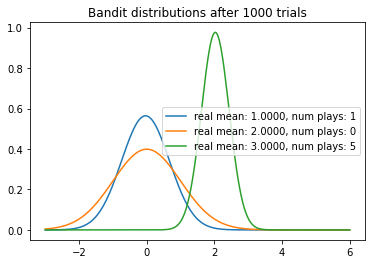

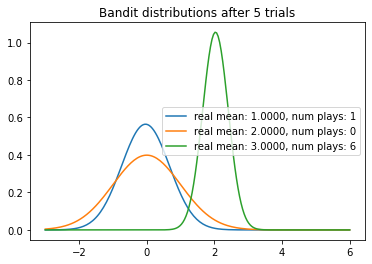

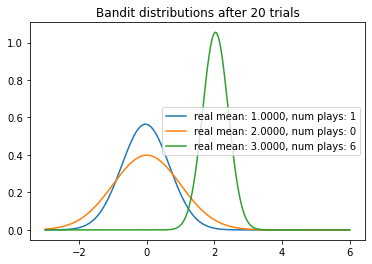

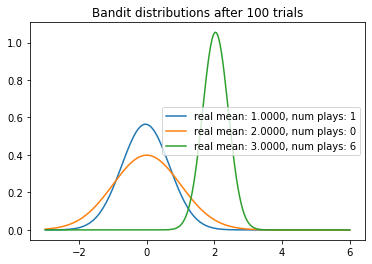

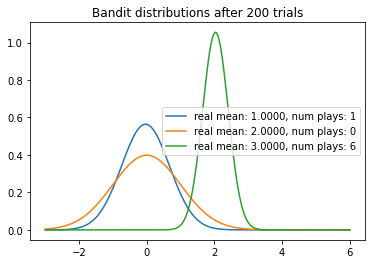

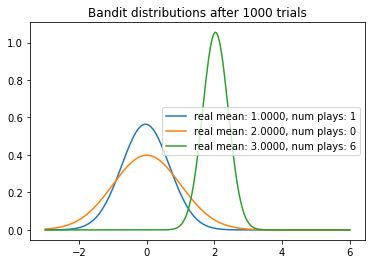

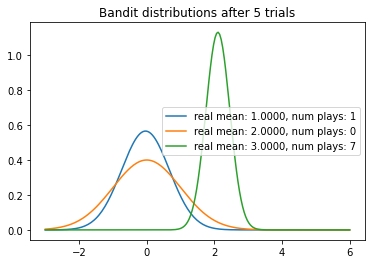

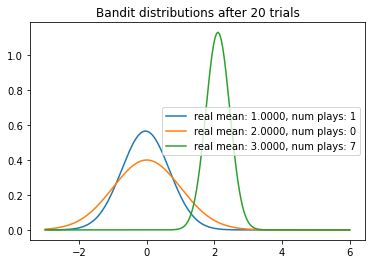

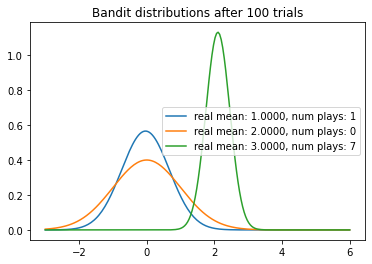

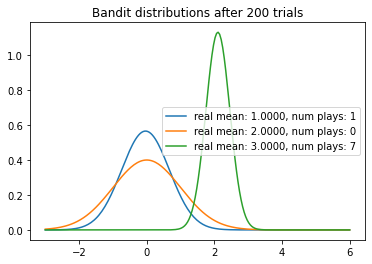

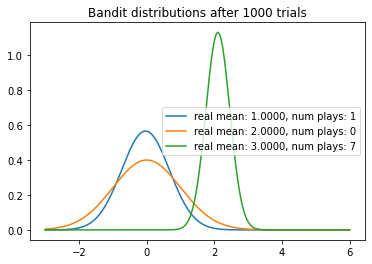

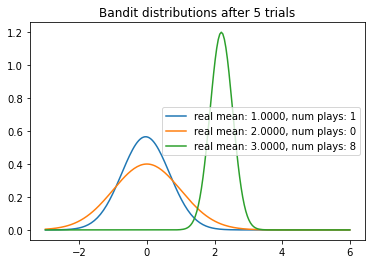

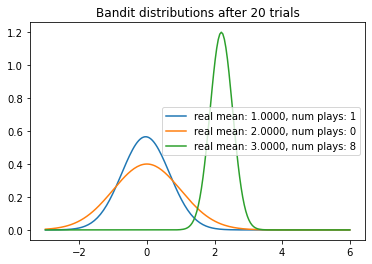

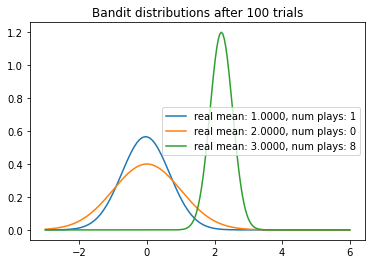

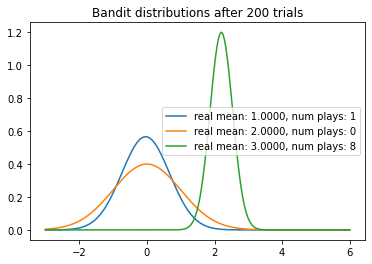

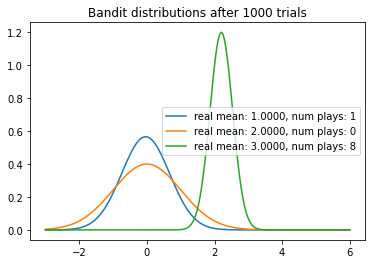

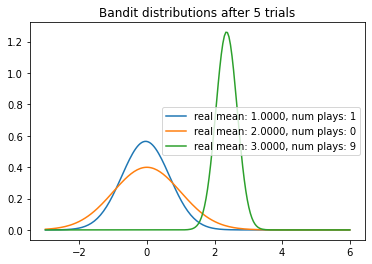

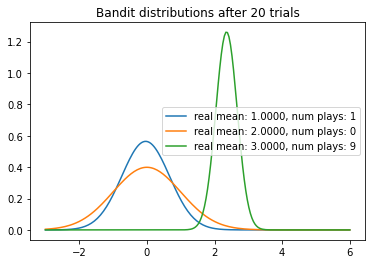

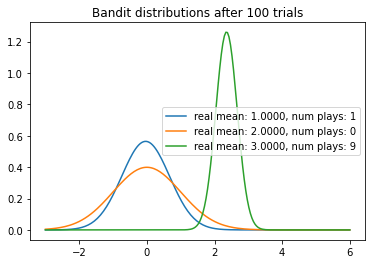

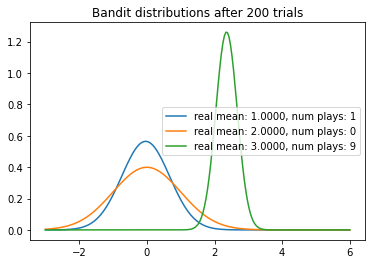

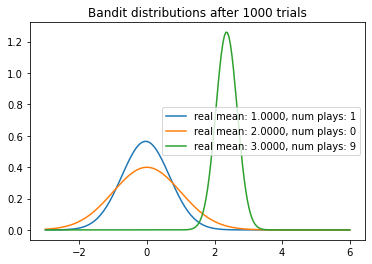

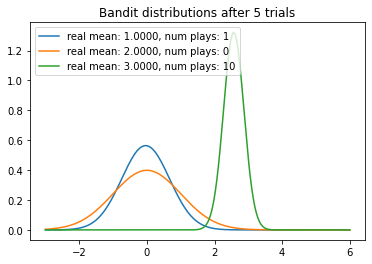

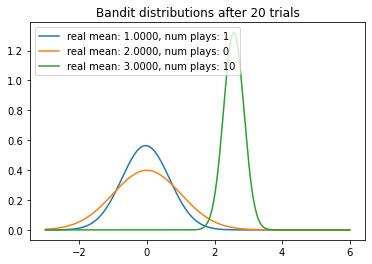

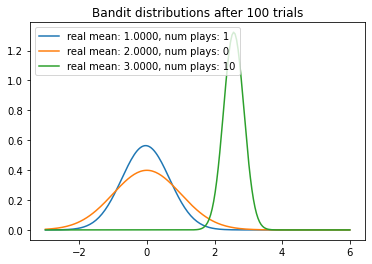

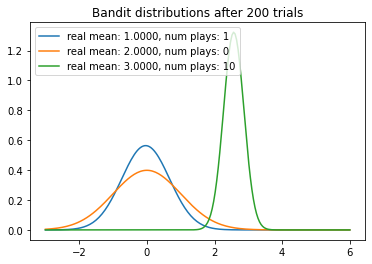

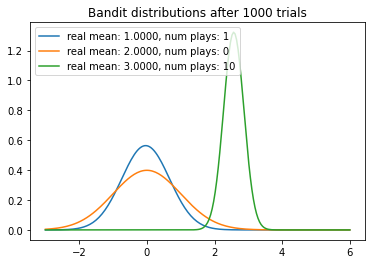

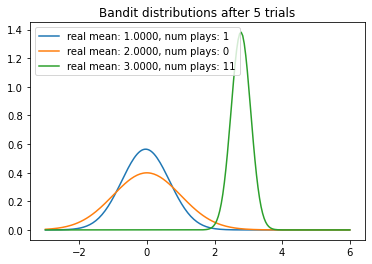

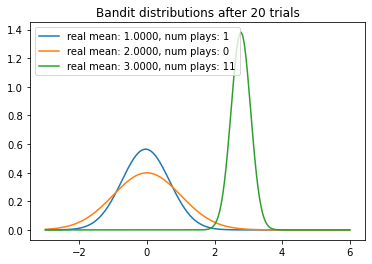

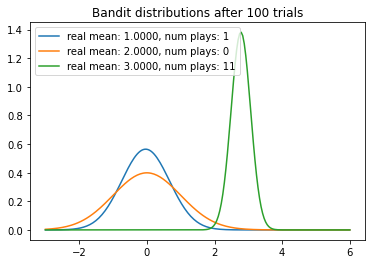

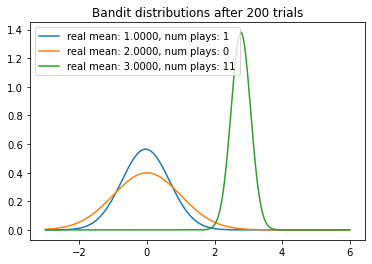

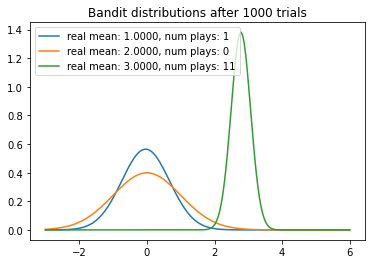

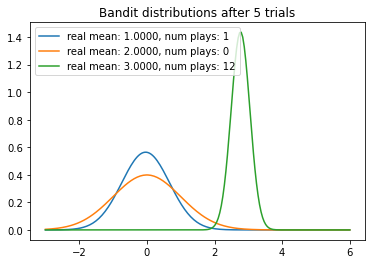

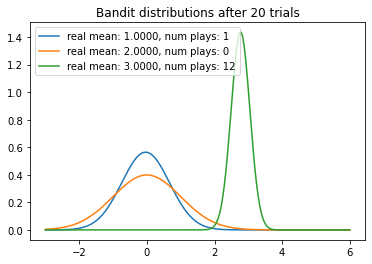

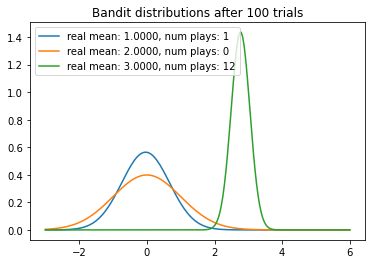

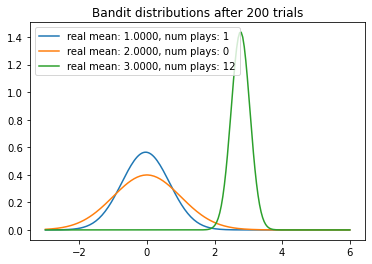

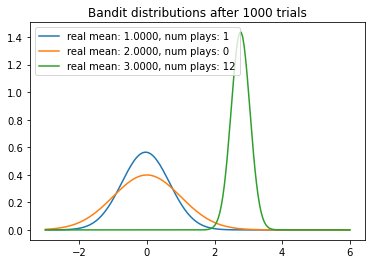

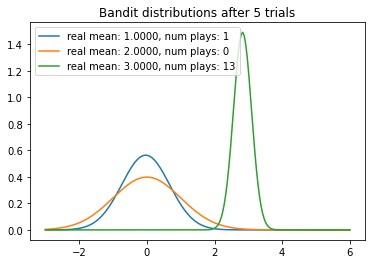

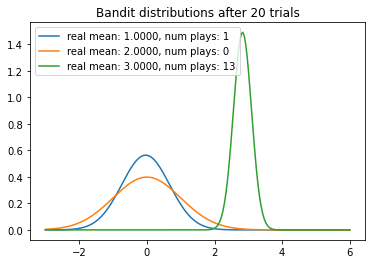

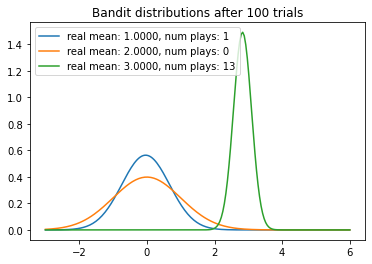

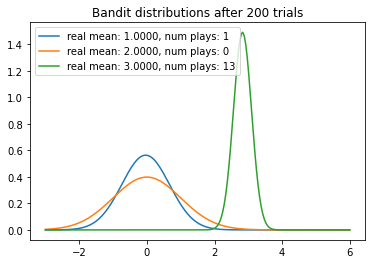

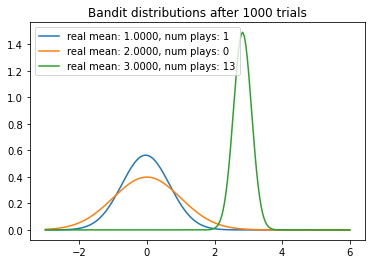

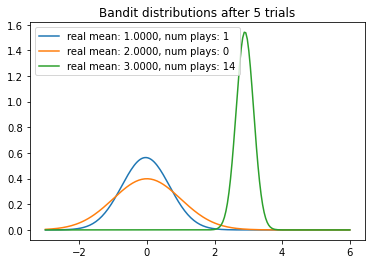

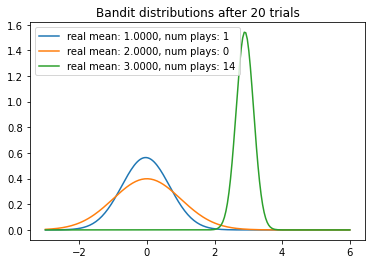

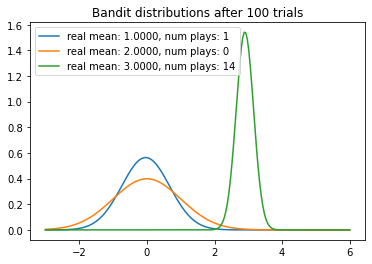

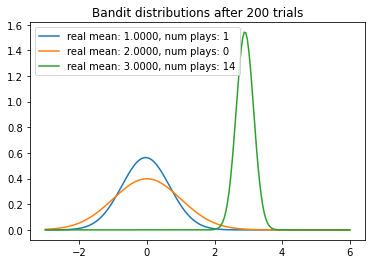

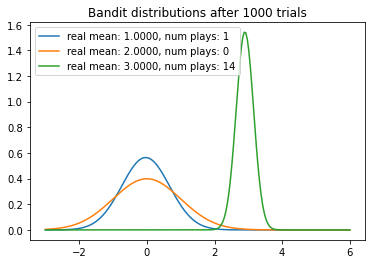

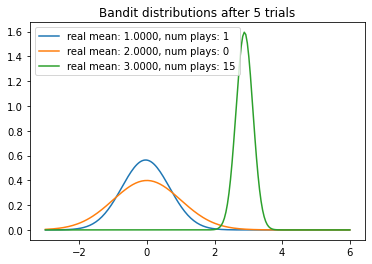

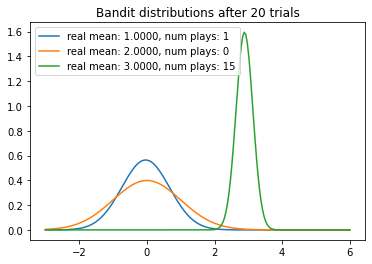

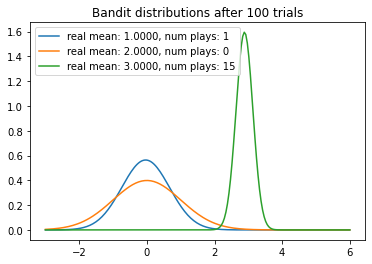

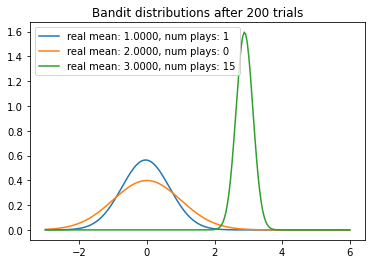

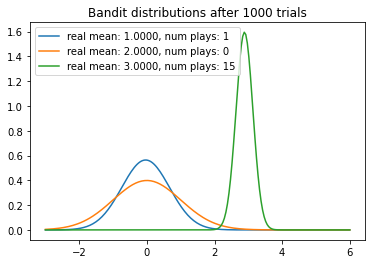

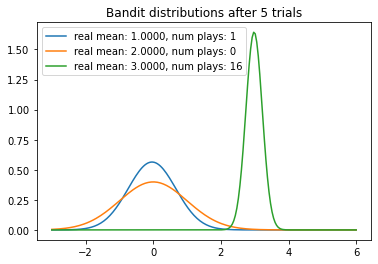

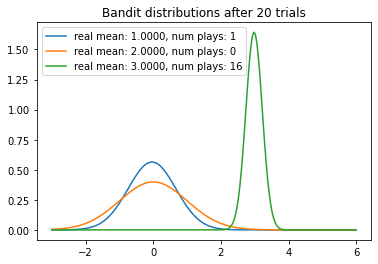

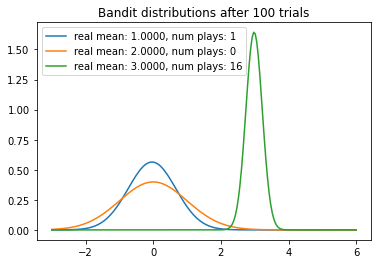

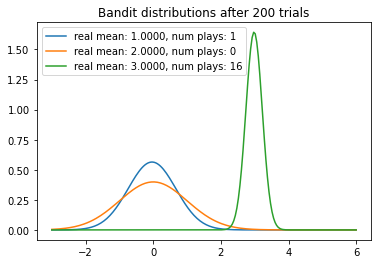

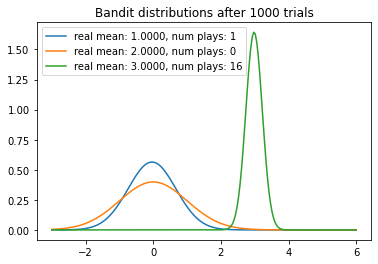

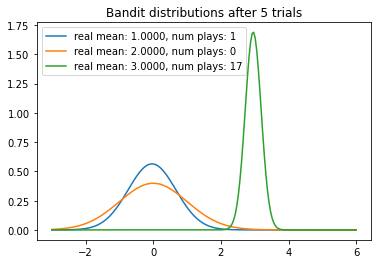

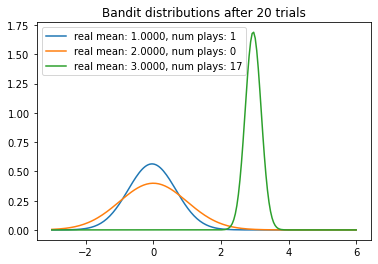

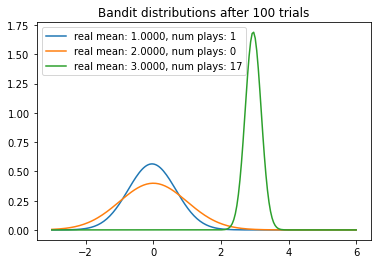

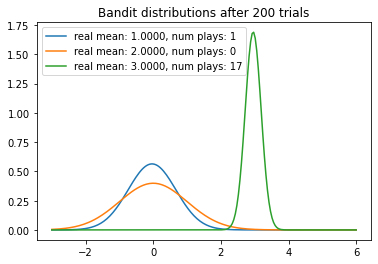

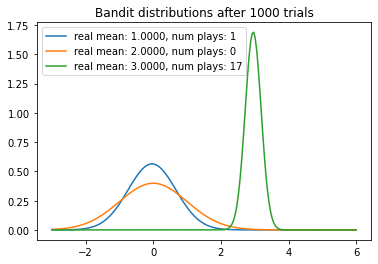

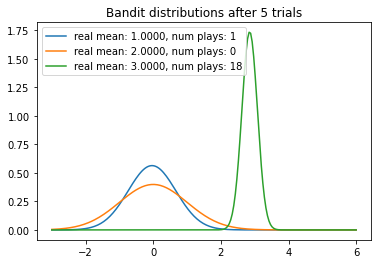

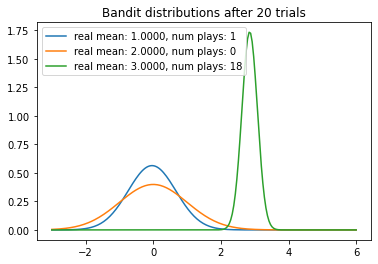

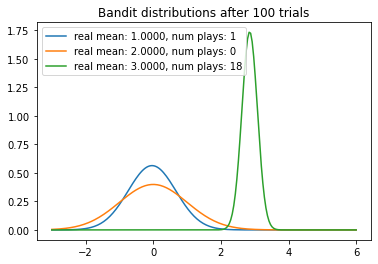

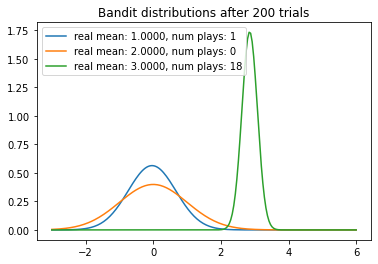

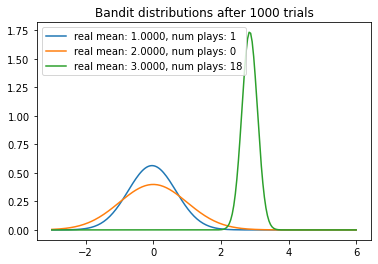

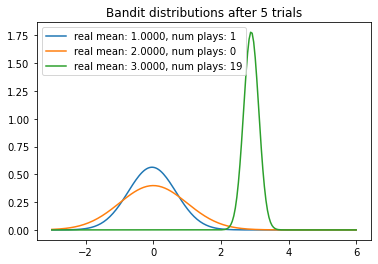

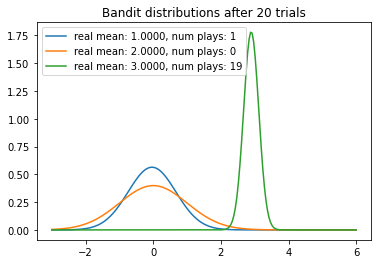

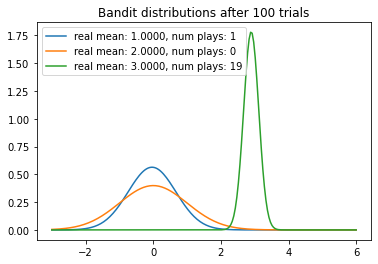

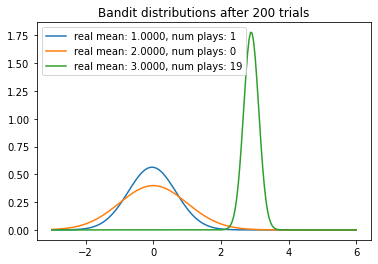

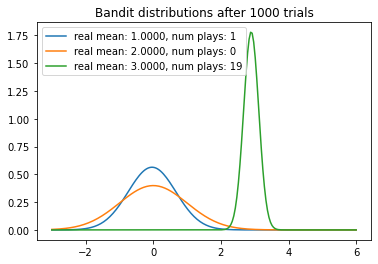

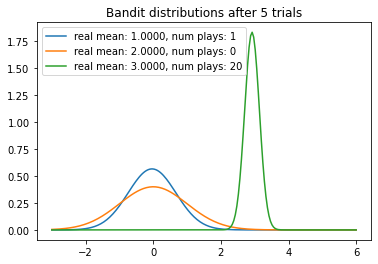

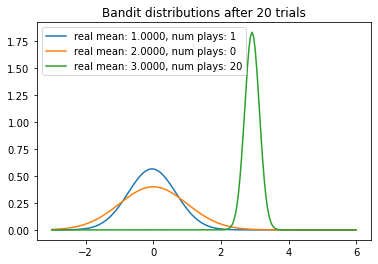

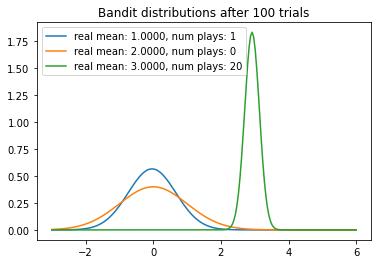

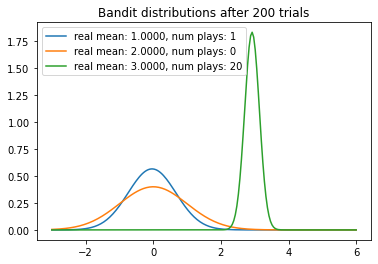

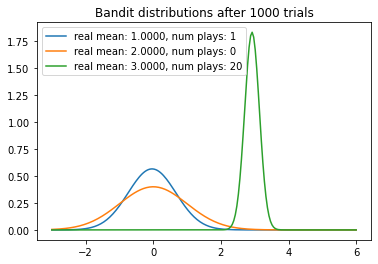

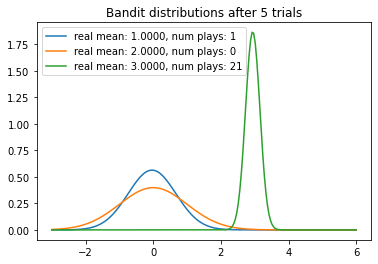

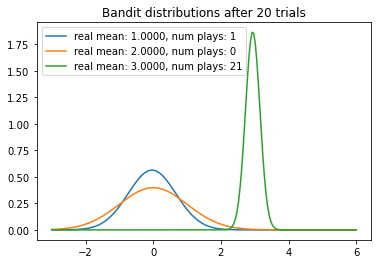

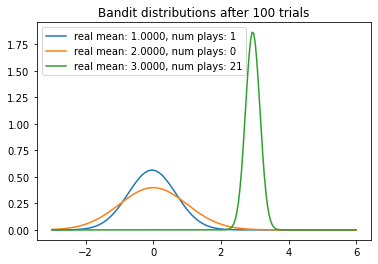

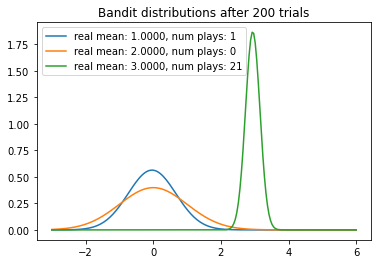

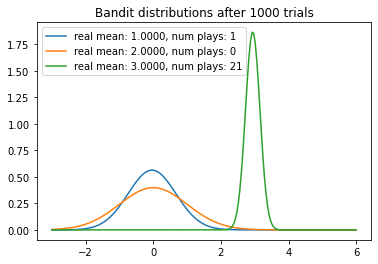

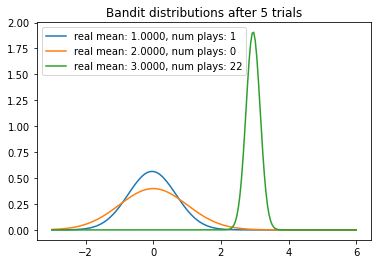

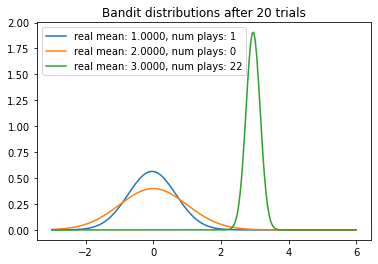

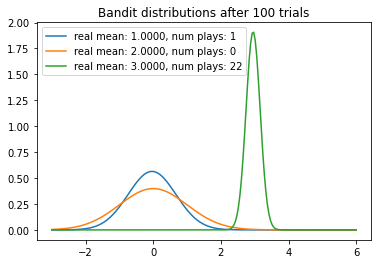

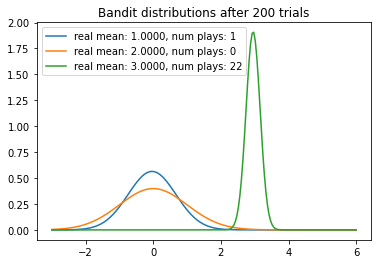

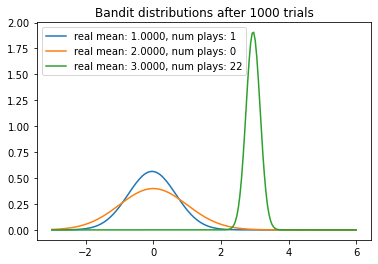

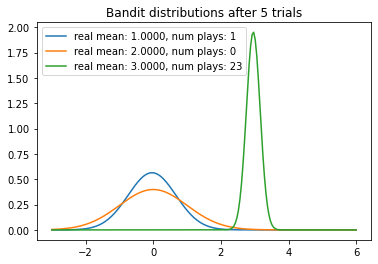

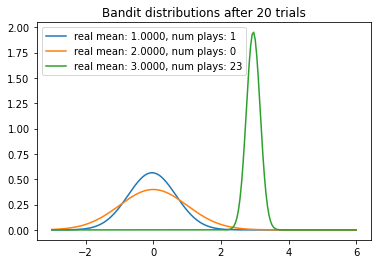

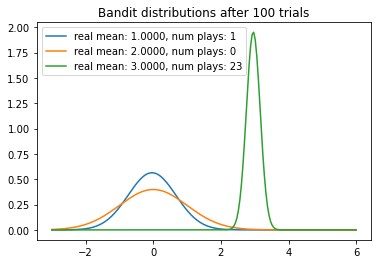

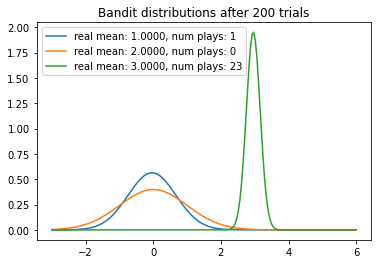

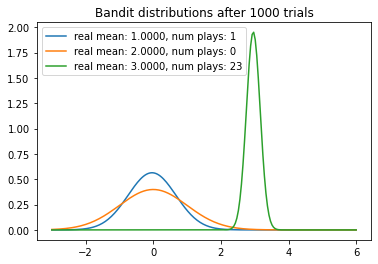

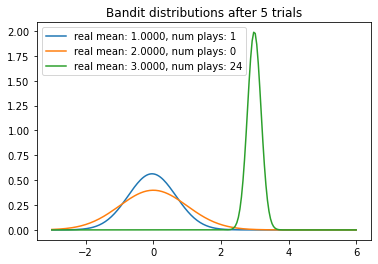

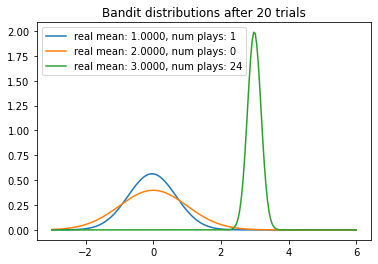

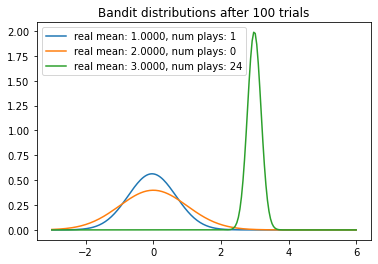

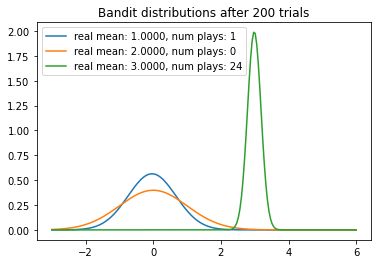

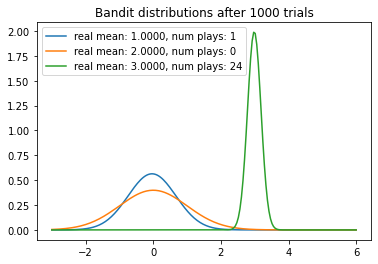

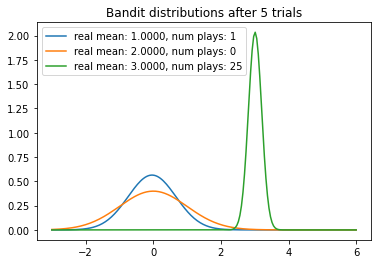

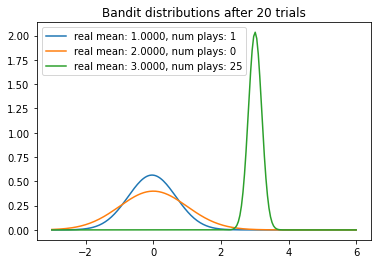

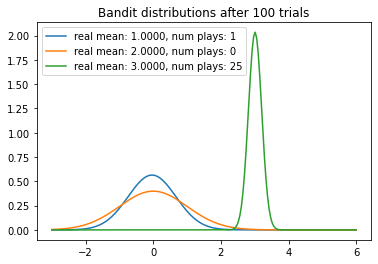

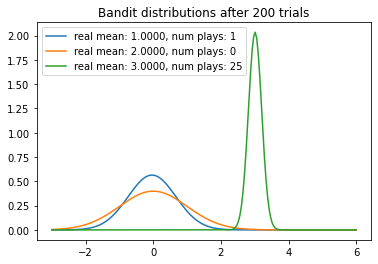

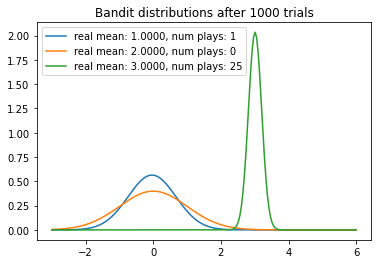

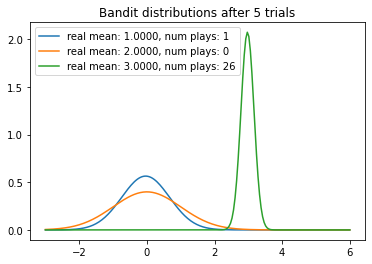

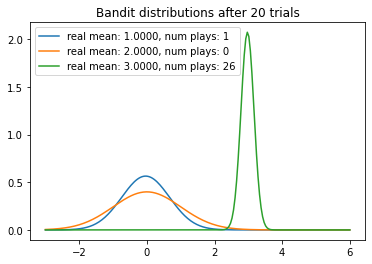

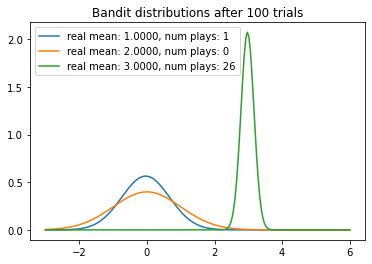

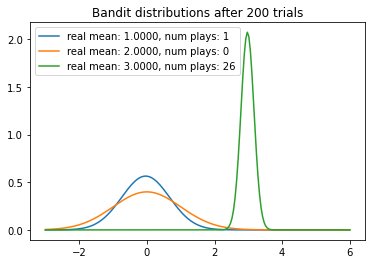

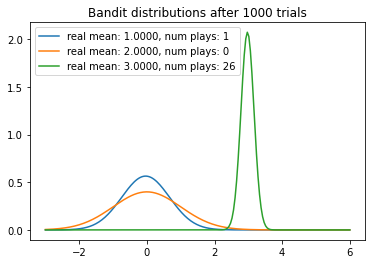

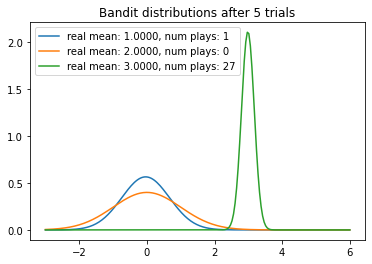

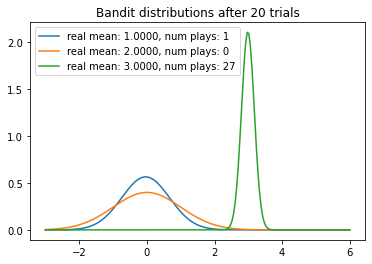

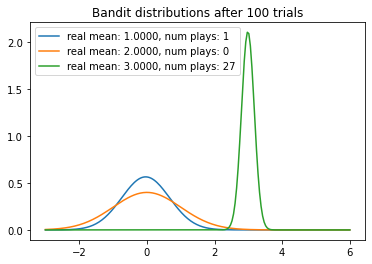

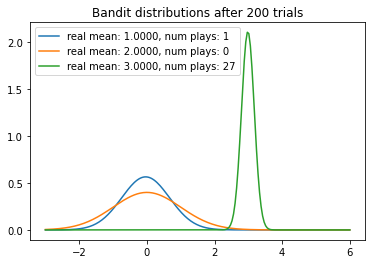

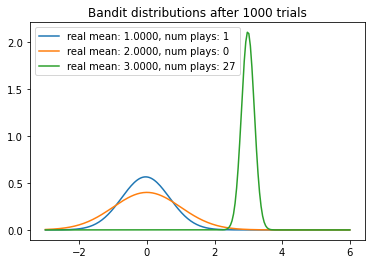

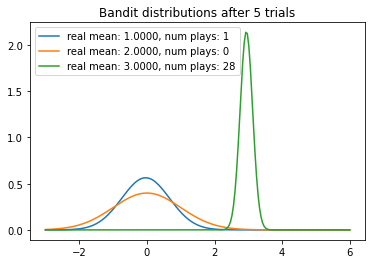

KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>

In [8]:
np.random.seed(1)
NUM_TRIALS = 2000
BANDIT_MEANS = [1, 2, 3]

class Bandit:
  def __init__(self, true_mean):
    self.true_mean = true_mean
    self.predicted_mean = 0
    self.lambda_ =1
    self.sum_x = 0
    self.tau = 1
    self.N = 0
  def pull(self):
    return np.random.randn()/np.sqrt(self.tau) + self.true_mean

  def sample(self):
    return np.random.randn()/np.sqrt(self.lambda_) + self.predicted_mean

  def update(self, x):
    self.lambda_ += self.tau
    self.sum_x += x
    self.predicted_mean = self.tau*self.sum_x/self.lambda_
    self.N += 1

def plot(bandits, trial):
  x = np.linspace(-3, 6, 200);
  for b in bandits:
    y = norm.pdf(x, b.predicted_mean, np.sqrt(1./b.lambda_))
    plt.plot(x, y, label=f'real mean: {b.true_mean:.4f}, num plays: {b.N}')
  plt.title(f'Bandit distributions after {trial} trials')
  plt.legend()
  plt.show()

def run_experiment():
  bandits = [Bandit(m) for m in BANDIT_MEANS]

  sample_points = [5, 20, 100, 200, 1000, 2000]
  rewards = np.empty(NUM_TRIALS)
  for i in range(NUM_TRIALS):
    # Thompson sampling
    j = np.argmax([b.sample() for b in bandits])

    for i in sample_points:
      plot(bandits, i)

    x = bandits[j].pull()

    rewards[i]  = x
    bandits[j].update(x)

  cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_MEANS))
  plt.xscale('log')
  plt.show()

  # plot moving average ctr linear
  plt.plot(cumulative_average)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_MEANS))
  plt.show()

  for b in bandits:
    print(b.p_estimate)

  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num times selected each bandit:", [b.N for b in bandits])

  return cumulative_average

if __name__ == "__main__":
  run_experiment()